K-Means and Gaussian Mixture Model (GMM)

🔹 First 10 rows of the dataset:
   Feature1  Feature2  TrueCluster
0  3.895370 -4.028263            2
1 -0.297948  2.920798            1
2  3.013410 -2.677727            2
3  3.604071 -3.594549            2
4  3.165242 -3.205493            2
5  3.228879 -2.875822            2
6  4.498746 -1.379171            1
7  1.307834  1.320511            1
8  0.909186 -1.693054            0
9  0.097863 -0.703802            0


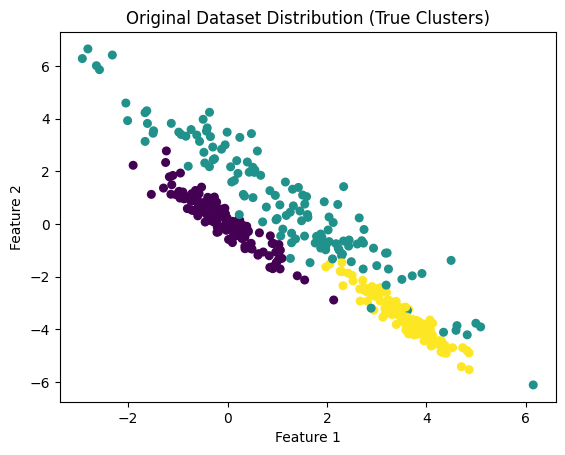

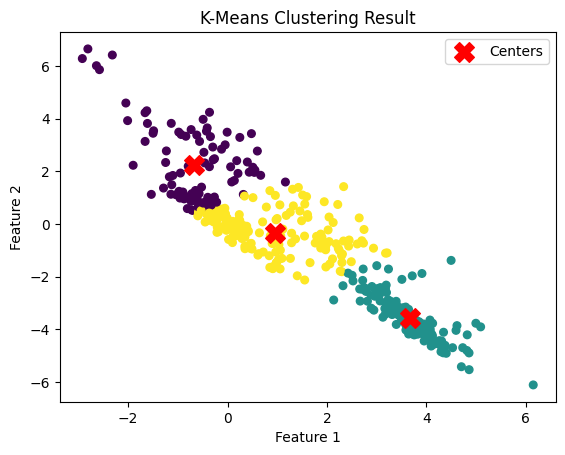

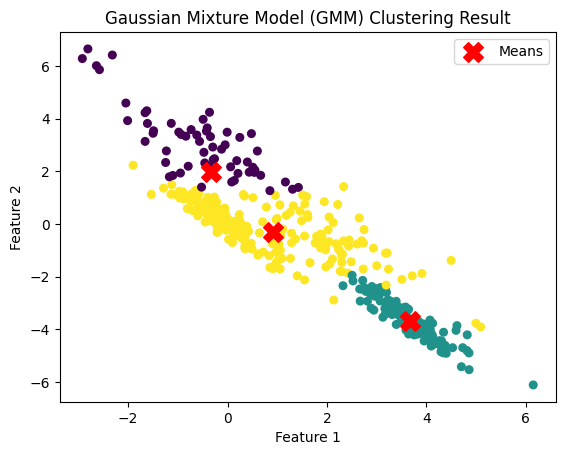


🔹 Comparison Results:
K-Means ARI Score: 0.4101117076253836
GMM ARI Score: 0.5153829682645429

Confusion Matrix - K-Means:
 [[ 44   1  89]
 [ 51  17  65]
 [  0 128   5]]

Confusion Matrix - GMM:
 [[  6   0 128]
 [ 53   7  73]
 [  0 127   6]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix

# 1. Generate dataset (elliptical, overlapping clusters)
X, y_true = make_blobs(n_samples=400, centers=[[0,0],[5,5],[6,0]], cluster_std=[1.0, 2.5, 0.8], random_state=42)

# Apply transformation to make clusters elliptical
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Convert to DataFrame for printing
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["TrueCluster"] = y_true

print("🔹 First 10 rows of the dataset:")
print(df.head(10))

# 2. Show distribution (ground truth clusters)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap="viridis", s=30)
plt.title("Original Dataset Distribution (True Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centers")
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 4. GMM clustering
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap="viridis", s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
            c="red", marker="X", s=200, label="Means")
plt.title("Gaussian Mixture Model (GMM) Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 5. Compare using Adjusted Rand Index & Confusion Matrices
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
ari_gmm = adjusted_rand_score(y_true, labels_gmm)

print("\n🔹 Comparison Results:")
print("K-Means ARI Score:", ari_kmeans)
print("GMM ARI Score:", ari_gmm)

print("\nConfusion Matrix - K-Means:\n", confusion_matrix(y_true, labels_kmeans))
print("\nConfusion Matrix - GMM:\n", confusion_matrix(y_true, labels_gmm))


🔹 First 10 rows of the dataset:
   Residue_Number Residue_Name  Window  Hydropathy_Cutoff  \
0               1            M       3                0.4   
1               2            E       3                0.4   
2               3            P       3                0.4   
3               4            A       3                0.4   
4               5            A       3                0.4   
5               6            G       3                0.4   
6               7            S       3                0.4   
7               8            S       3                0.4   
8               9            M       3                0.4   
9              10            E       3                0.4   

   Minimum_Blob_Length  blob_length  Normalized_Mean_Blob_Hydropathy  \
0                    4            4                         0.461111   
1                    4            4                         0.461111   
2                    4            4                         0.461111   
3       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5968\3024673404.py:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y_true if y_true is not None else 'gray', cmap="viridis", s=30)


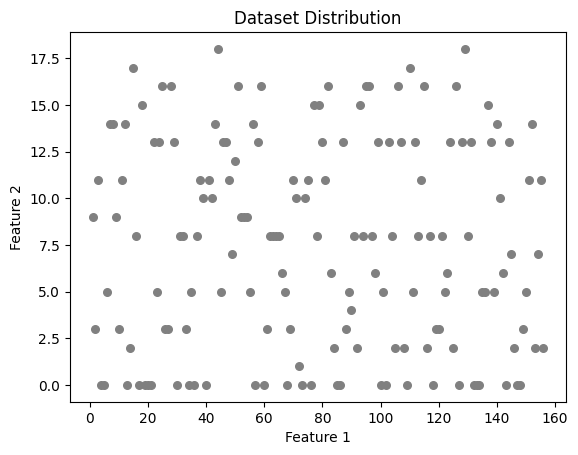

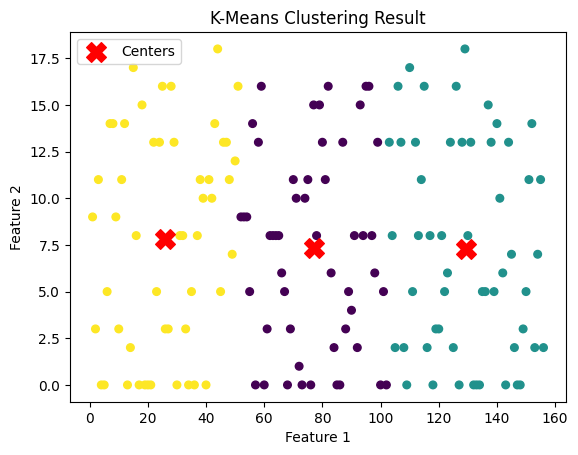

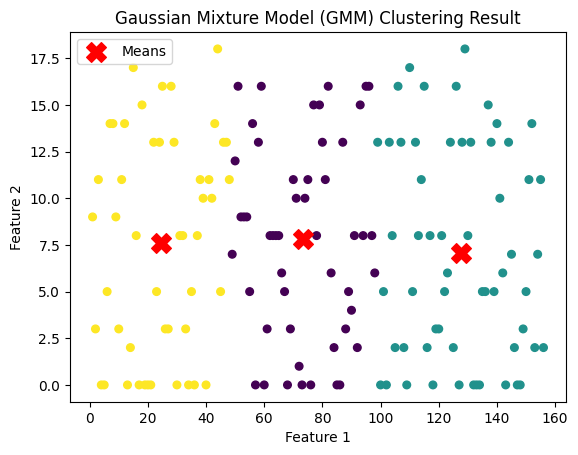

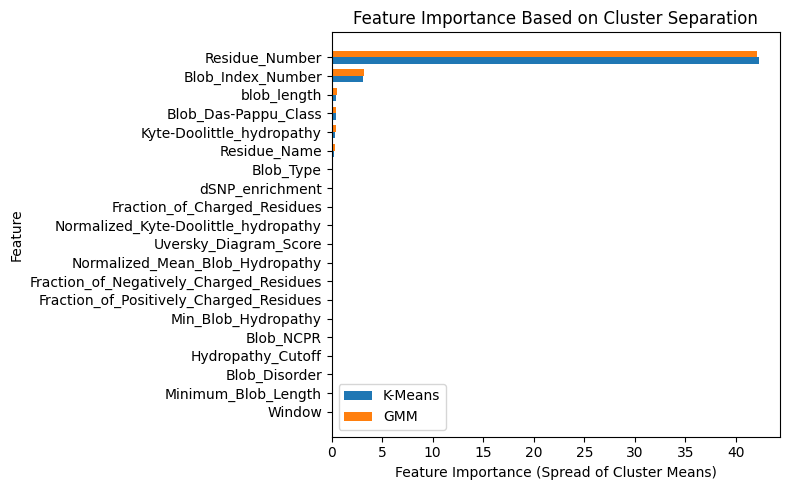

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load dataset
df = pd.read_csv("blob.csv")  # <-- Ensure blob.csv is in same directory
print("🔹 First 10 rows of the dataset:")
print(df.head(10))

# 2️⃣ Encode any non-numeric columns automatically
for col in df.columns:
    if df[col].dtype == 'object':
        #print(f"⚠️ Encoding non-numeric column: {col}")
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 3️⃣ Separate features and target if TrueCluster exists
if "TrueCluster" in df.columns:
    X = df.drop("TrueCluster", axis=1).values
    y_true = df["TrueCluster"].values
else:
    X = df.values
    y_true = None

# 4️⃣ Show distribution
if X.shape[1] >= 2:  # Only plot if at least 2 features
    plt.scatter(X[:, 0], X[:, 1], c=y_true if y_true is not None else 'gray', cmap="viridis", s=30)
    plt.title("Dataset Distribution")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 5️⃣ K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centers")
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 6️⃣ Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap="viridis", s=30)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1],
            c="red", marker="X", s=200, label="Means")
plt.title("Gaussian Mixture Model (GMM) Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 7️⃣ Compare results (if ground truth available)
if y_true is not None:
    ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)
    ari_gmm = adjusted_rand_score(y_true, labels_gmm)

    print("\n🔹 Comparison Results:")
    print("K-Means ARI Score:", ari_kmeans)
    print("GMM ARI Score:", ari_gmm)

    print("\nConfusion Matrix - K-Means:\n", confusion_matrix(y_true, labels_kmeans))
    print("\nConfusion Matrix - GMM:\n", confusion_matrix(y_true, labels_gmm))

# 8️⃣ “Feature Importance” — cluster spread
feature_names = df.columns.drop("TrueCluster") if "TrueCluster" in df.columns else df.columns
kmeans_spread = np.std(kmeans.cluster_centers_, axis=0)
gmm_spread = np.std(gmm.means_, axis=0)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "KMeans Importance": kmeans_spread,
    "GMM Importance": gmm_spread
}).sort_values(by="KMeans Importance", ascending=True)

# 9️⃣ Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bar_width = 0.35
y_pos = np.arange(len(importance_df))

plt.barh(y_pos - bar_width/2, importance_df["KMeans Importance"], height=bar_width, label="K-Means")
plt.barh(y_pos + bar_width/2, importance_df["GMM Importance"], height=bar_width, label="GMM")

plt.yticks(y_pos, importance_df["Feature"])
plt.xlabel("Feature Importance (Spread of Cluster Means)")
plt.ylabel("Feature")
plt.title("Feature Importance Based on Cluster Separation")
plt.legend()
plt.tight_layout()
plt.show()
